# Introduction
Lebanon ranked first among the Arab countries in consuming coffee. This short survey focused on the Lebanese programmers only. The aims were to examine if the Lebanese programmers consume coffee above the normal average level comparing to the average consumption in Lebanon which is 1.4 cups of coffee per day.

Content:    
1. [Load and Check](#1)
1. [Varriable Description](#2)
    * [Univarite Variable Analysis](#3)
        * [Caterogical Variable Analysis](#4)    
        * [Numerical Variable Analysis](#5)
1. [Basic Data Analysis](#6) 
1. [Missing Value](#7)
    * [Find Missing Value](#8)
    * [Fill Missing Value](#9)
1. [Conclusion](#10)    

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/coffee-and-code/CoffeeAndCodeLT2018.csv


<a id = "1"></a>
# 1) Load and Check

In [2]:
df = pd.read_csv("/kaggle/input/coffee-and-code/CoffeeAndCodeLT2018.csv")

In [3]:
df.columns

Index(['CodingHours', 'CoffeeCupsPerDay', 'CoffeeTime', 'CodingWithoutCoffee',
       'CoffeeType', 'CoffeeSolveBugs', 'Gender', 'Country', 'AgeRange'],
      dtype='object')

In [4]:
df.head()

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
0,8,2,Before coding,Yes,Caffè latte,Sometimes,Female,Lebanon,18 to 29
1,3,2,Before coding,Yes,Americano,Yes,Female,Lebanon,30 to 39
2,5,3,While coding,No,Nescafe,Yes,Female,Lebanon,18 to 29
3,8,2,Before coding,No,Nescafe,Yes,Male,Lebanon,NaN
4,10,3,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29


In [5]:
df.describe()

,CodingHours,CoffeeCupsPerDay
count,100.000000,100.000000
mean,6.410000,2.890000
std,2.644205,1.613673
min,1.000000,1.000000
25%,4.000000,2.000000
50%,7.000000,2.500000
75%,8.000000,4.000000
max,10.000000,8.000000


<a id = "2"></a>
# 2) Variable Description
1. CodingHours: how long has been coding
1. CoffeeCupsPerDay: daily amount of coffee
1. CoffeeTime: when drinking coffee(before or while coding)
1. CodingWithoutCoffee: coding without coffee
1. CoffeeType: coffee making type(Turkish, Americano, Nescafe)
1. CoffeeSolveBugs: solving mistakes in drink coffee
1. Gender: male or female
1. Country: this data for Lebanon
1. AgeRange: in what age range

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CodingHours          100 non-null    int64 
 1   CoffeeCupsPerDay     100 non-null    int64 
 2   CoffeeTime           100 non-null    object
 3   CodingWithoutCoffee  100 non-null    object
 4   CoffeeType           99 non-null     object
 5   CoffeeSolveBugs      100 non-null    object
 6   Gender               100 non-null    object
 7   Country              100 non-null    object
 8   AgeRange             98 non-null     object
dtypes: int64(2), object(7)
memory usage: 7.2+ KB


* int64(2): CodingHours, CoffeeCupsPerDay
* object(7): CoffeeTime, CodingWithoutCoffee, CoffeeType, CoffeeSolveBugs, Gender, Country, AgeRange 

<a id = "3"></a>
# Univarite Variable Analysis
* Caterogical Variables: CoffeeTime, CodingWithoutCoffee, CoffeeType, CoffeeSolveBugs, Gender, Country, AgeRange
* Numerical Variables:  CodingHours, CoffeeCupsPerDay

<a id = "4"></a>
## Categorical Variables

In [7]:
def count_plot(variable):
    """
        input: variable example: "CoffeTime"
        output: count plot and value count
    """
    # get feature
    var = df[variable]
    
    #visualization
    plt.figure(figsize=(10,4))
    sns.countplot(x=var, palette="dark", order=var.value_counts().index)
    plt.xticks(rotation=45)
    plt.ylabel("Frequency")
    plt.title(variable)
    print("{}".format(var.value_counts()))
    plt.show()

While coding               61
Before coding              25
Before and while coding     4
All the time                4
In the morning              3
After coding                2
No specific time            1
Name: CoffeeTime, dtype: int64


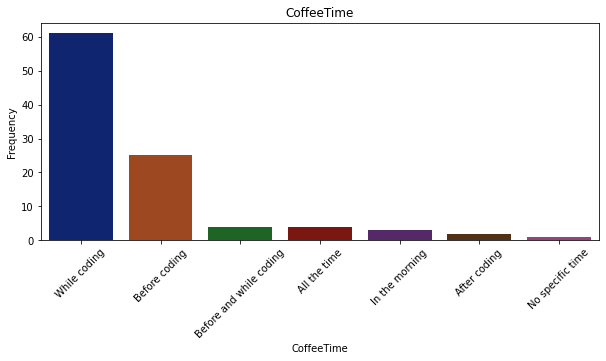

Sometimes    51
Yes          30
No           19
Name: CodingWithoutCoffee, dtype: int64


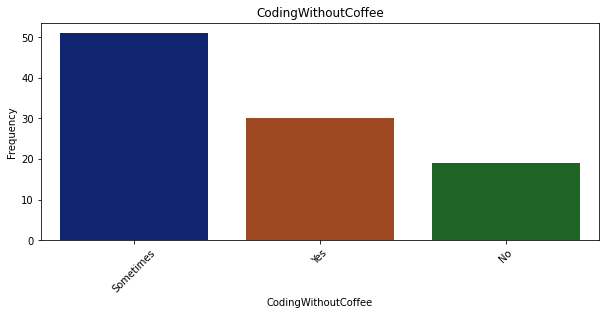

Nescafe                     32
American Coffee             23
Turkish                     19
Espresso (Short Black)       8
Cappuccino                   7
Caffè latte                  5
Double Espresso (Doppio)     3
Americano                    2
Name: CoffeeType, dtype: int64


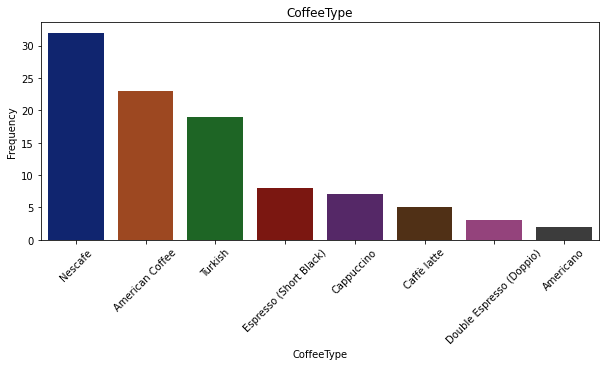

Sometimes    43
Yes          30
No           27
Name: CoffeeSolveBugs, dtype: int64


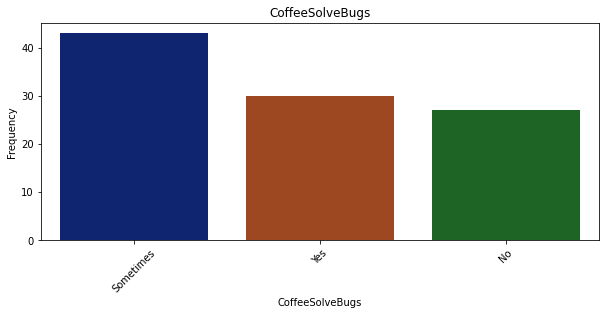

Male      74
Female    26
Name: Gender, dtype: int64


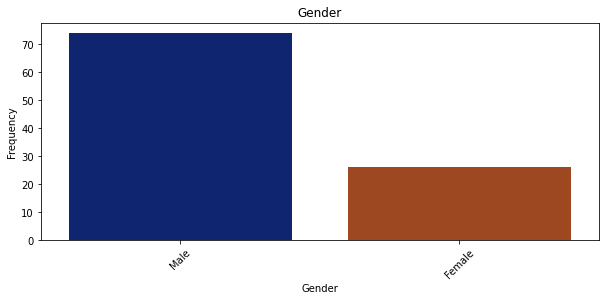

Lebanon    100
Name: Country, dtype: int64


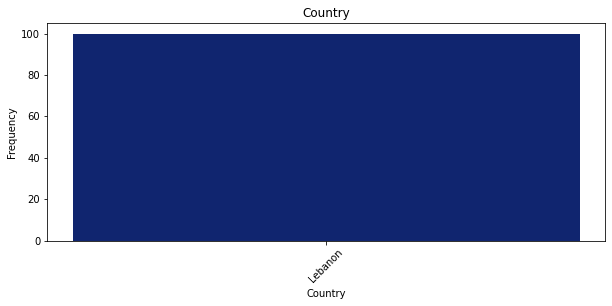

18 to 29    60
30 to 39    29
40 to 49     6
Under 18     2
50 to 59     1
Name: AgeRange, dtype: int64


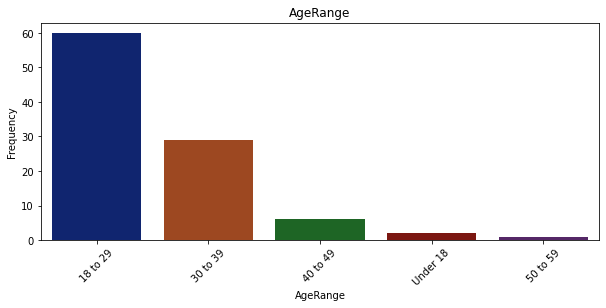

In [8]:
categorical = ["CoffeeTime", "CodingWithoutCoffee", "CoffeeType", "CoffeeSolveBugs", "Gender", "Country", "AgeRange"]
for i in categorical:
    count_plot(i)

<a id="5"></a>
## Numerical Variables

8     19
10    17
6     14
7     10
3     10
2      9
4      8
9      6
5      6
1      1
Name: CodingHours, dtype: int64


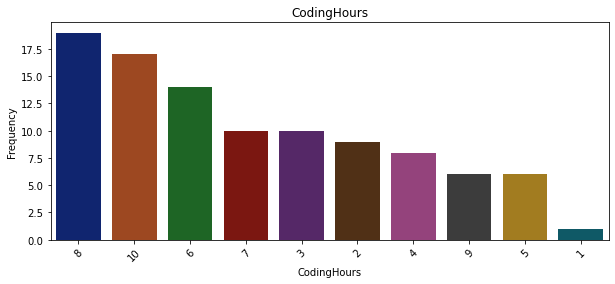

2    34
3    23
1    16
4    15
6     4
7     3
5     3
8     2
Name: CoffeeCupsPerDay, dtype: int64


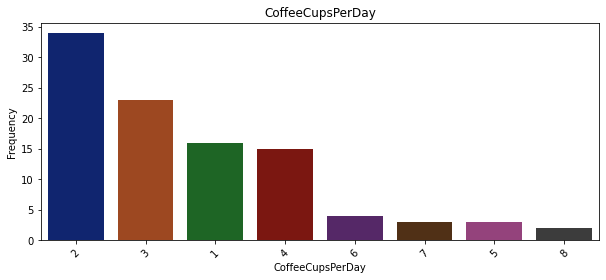

In [9]:
numerical = ["CodingHours", "CoffeeCupsPerDay"]
for i in numerical:
    count_plot(i)

<a id="6"></a>
# 3) Basic Data Analysis
* Gender-CoffeeType
* AgeRange-CoffeeCupsPerDay
* Gender-CoffeeCupsPerDay
* CodingHours-CoffeeCupsPerDay
* CoffeeSolveBugs-CoffeeCupsPerDay
* CodingWithoutCoffee-CoffeeSolveBugs

## Gender-CoffeeType

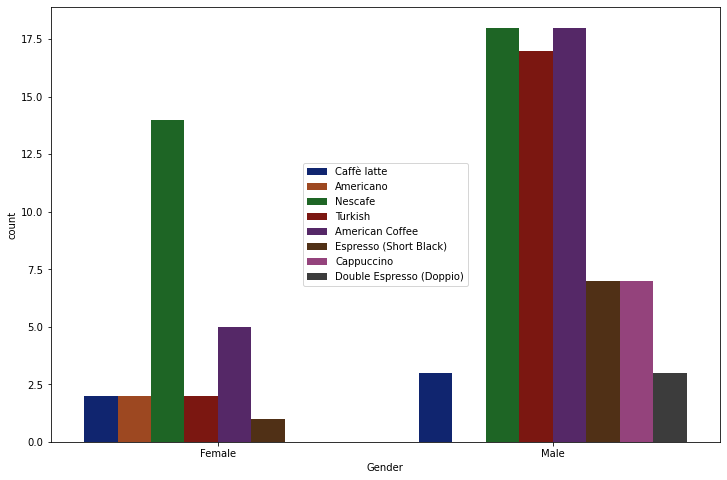

In [10]:
plt.figure(figsize=(12,8))
sns.countplot("Gender", data=df, hue="CoffeeType", palette="dark")
plt.legend(loc="center")

## AgeRange-CoffeeCupsPerDay

In [11]:
df[["AgeRange","CoffeeCupsPerDay"]].groupby(["AgeRange"]).mean().sort_values(by="CoffeeCupsPerDay", ascending=False)

,CoffeeCupsPerDay
AgeRange,
40 to 49,3.166667
18 to 29,3.016667
Under 18,3.000000
30 to 39,2.655172
50 to 59,2.000000


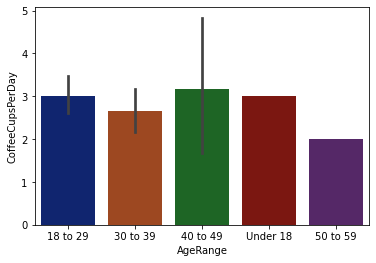

In [12]:
sns.barplot(x="AgeRange", y="CoffeeCupsPerDay",data=df, palette="dark")

## Gender-CoffeeCupsPerDay

In [13]:
df[["Gender","CoffeeCupsPerDay"]].groupby(["Gender"]).mean().sort_values(by="CoffeeCupsPerDay", ascending=False)

,CoffeeCupsPerDay
Gender,
Male,3.108108
Female,2.269231


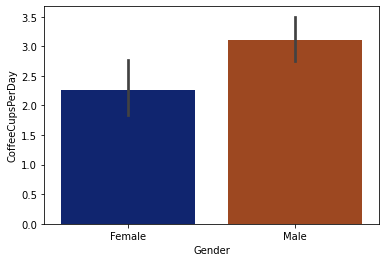

In [14]:
sns.barplot(x="Gender", y="CoffeeCupsPerDay", data=df, palette="dark")

## CodingHours-CoffeeCupsPerDay

In [15]:
df[["CodingHours","CoffeeCupsPerDay"]].groupby(["CodingHours"]).mean().sort_values(by="CoffeeCupsPerDay", ascending=False)

,CoffeeCupsPerDay
CodingHours,
10,3.882353
9,3.500000
7,3.200000
5,3.000000
4,2.750000
8,2.684211
6,2.642857
2,2.222222
3,2.100000


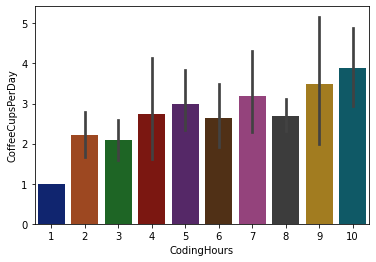

In [16]:
sns.barplot(x="CodingHours", y="CoffeeCupsPerDay", data=df, palette="dark")

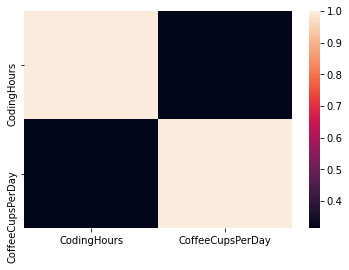

In [17]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## CoffeeSolveBugs-CoffeeCupsPerDay

In [18]:
df[["CoffeeSolveBugs","CoffeeCupsPerDay"]].groupby(["CoffeeSolveBugs"]).mean().sort_values(by="CoffeeCupsPerDay", ascending=False)

,CoffeeCupsPerDay
CoffeeSolveBugs,
Yes,3.466667
Sometimes,2.790698
No,2.407407


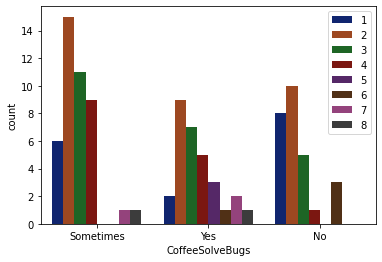

In [19]:
sns.countplot("CoffeeSolveBugs", hue="CoffeeCupsPerDay", palette="dark", data=df)
plt.legend(loc="upper right")

## CodingWithoutCoffee-CoffeeSolveBugs

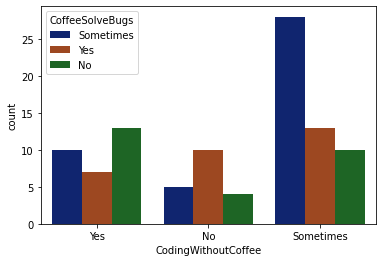

In [20]:
sns.countplot("CodingWithoutCoffee", hue="CoffeeSolveBugs",data=df, palette="dark")

<a id="7"></a>
# 4) Missing Values
* Find Missing Value
* Fill Missing Value

<a id="8"></a>
## Find Missing Value

In [21]:
df.columns[df.isnull().any()]

Index(['CoffeeType', 'AgeRange'], dtype='object')

In [22]:
df.isnull().sum()

CodingHours            0
CoffeeCupsPerDay       0
CoffeeTime             0
CodingWithoutCoffee    0
CoffeeType             1
CoffeeSolveBugs        0
Gender                 0
Country                0
AgeRange               2
dtype: int64

<a id="9"></a>
## Fill Missing Value
* CoffeeType: 1
* AgeRange: 2

In [23]:
# Missing Value Table
def missing_value_table(df): 
    missing_value = df.isnull().sum()
    missing_value_percent = 100 * df.isnull().sum()/len(df)
    missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_value_table_return = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Value'})
    return missing_value_table_return
  
missing_value_table(df)

,Missing Values,% Value
CodingHours,0,0.0
CoffeeCupsPerDay,0,0.0
CoffeeTime,0,0.0
CodingWithoutCoffee,0,0.0
CoffeeType,1,1.0
CoffeeSolveBugs,0,0.0
Gender,0,0.0
Country,0,0.0
AgeRange,2,2.0


In [24]:
df[df.CoffeeType.isnull()]

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
43,10,6,While coding,Sometimes,NaN,No,Male,Lebanon,18 to 29


In [25]:
df[df.AgeRange.isnull()]

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
3,8,2,Before coding,No,Nescafe,Yes,Male,Lebanon,NaN
6,5,2,While coding,Yes,Nescafe,Sometimes,Male,Lebanon,NaN


In [26]:
df["CoffeeType"] = df["CoffeeType"].fillna("Nescafe") 

I have filled with "Nescafe" because it was most consumed value. So nothing will change


In [27]:
df["AgeRange"] = df["AgeRange"].fillna("18 to 29") 

I filled with "18 to 29".

In [28]:
df.isnull().sum()

CodingHours            0
CoffeeCupsPerDay       0
CoffeeTime             0
CodingWithoutCoffee    0
CoffeeType             0
CoffeeSolveBugs        0
Gender                 0
Country                0
AgeRange               0
dtype: int64

<a id="10"></a>
# 5) Conclusion
1. Coffee is most often consumed during coding.(61 people)
1. Nescafe is the most popular type of coffee.(32 people)
1. the majority of people in the dataset are male.(male:%74, female:%26)
1. all the people in the dataset are lebanon.(100 people)
1. maximum number of persons between the ages of 18-29(60)
1. On average, it consumes the most coffee between the ages of 40-49(3.16 cup of coffee)
1. coffee increases linearly as the coding hour increases
1. Women consume mostly nescafe, men consume nescafe and americano